In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

tiktok = pd.read_csv('tiktok_datasetEDA.csv')
tiktok.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [2]:
tiktok.drop(columns=['#', 'video_id'], inplace=True)
tiktok.head()

,claim_status,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,claim,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,claim,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,claim,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,claim,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,claim,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [3]:
tiktok.shape # Tenemos 19382 filas y 10 columnas

(19382, 10)

In [4]:
tiktok.info() # Como vemos hay algunos nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   claim_status              19084 non-null  object 
 1   video_duration_sec        19382 non-null  int64  
 2   video_transcription_text  19084 non-null  object 
 3   verified_status           19382 non-null  object 
 4   author_ban_status         19382 non-null  object 
 5   video_view_count          19084 non-null  float64
 6   video_like_count          19084 non-null  float64
 7   video_share_count         19084 non-null  float64
 8   video_download_count      19084 non-null  float64
 9   video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.5+ MB


In [5]:
tiktok.isna().sum()

claim_status                298
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [6]:
# Al tener casi 20000 filas los nulos representan un porcentaje ínfimo
tiktok = tiktok.dropna(axis=0)
tiktok.shape # Como vemos se han eliminado unos 300 aproximadamente, de 19000 así que no supondrán ningún problema.

(19084, 10)

In [7]:
# Miramos tambien por si acaso hay algún duplicado
tiktok.duplicated().sum()

0

In [8]:
tiktok.describe()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,32.423811,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,16.226470,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [9]:
tiktok.head()

,claim_status,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,claim,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,claim,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,claim,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,claim,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,claim,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


## HIPOTESIS:

#### - ¿Como recompensa el algoritmo?, duracion, caracteristicas, orientacion de este
#### - ¿Es realmente importante el verificado?, ¿Merece la pena?
#### - Como podemos evitar un baneo

---

#### ¿Como recompensa el algoritmo?

In [10]:
tiktok['text_length'] = tiktok['video_transcription_text'].apply(lambda x: len(str(x)))

Text(0.5, 1.0, 'Correlaciones de todos los videos')

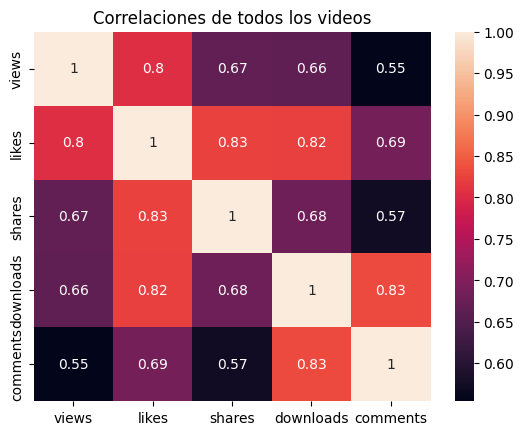

In [11]:
tiktok_corr = tiktok.copy()
tiktok_corr.drop(columns=['video_duration_sec', 'claim_status', 'verified_status', 'video_transcription_text', 'author_ban_status', 'text_length'], inplace=True)
tiktok_corr.columns = ['views', 'likes', 'shares', 'downloads', 'comments']
sns.heatmap(tiktok_corr.corr(numeric_only=True), annot=True);
plt.title('Correlaciones de todos los videos')
# Observamos fuerte correlación en las siguientes parejas:
    # likes - views
    # likes - shares
    # likes - downloads
    # downloads - comments

Text(0.5, 1.0, 'Correlaciones de videos de usuarios verificados')

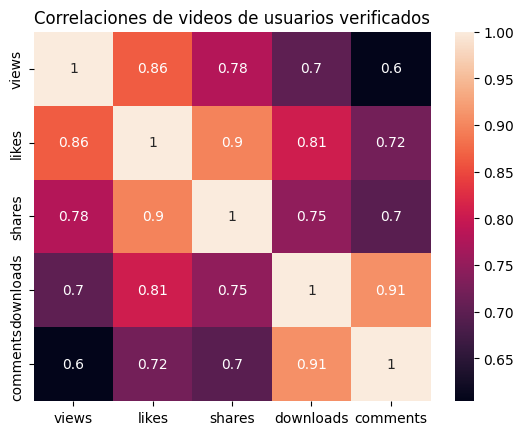

In [12]:
# Veamos ahora si esta correlacion varia para usuarios verificados 
tiktok_verified = tiktok.copy() # Para evitar warnings
tiktok_verified = tiktok_verified[tiktok_verified['verified_status'] == 'verified']
tiktok_verified.drop(columns=['video_duration_sec', 'claim_status', 'verified_status', 'video_transcription_text', 'author_ban_status', 'text_length'], inplace=True)
tiktok_verified.columns = ['views', 'likes', 'shares', 'downloads', 'comments'] 
sns.heatmap(tiktok_verified.corr(numeric_only=True), annot=True)
plt.title('Correlaciones de videos de usuarios verificados')


Text(0.5, 1.0, 'Correlaciones de videos de usuarios no verificados')

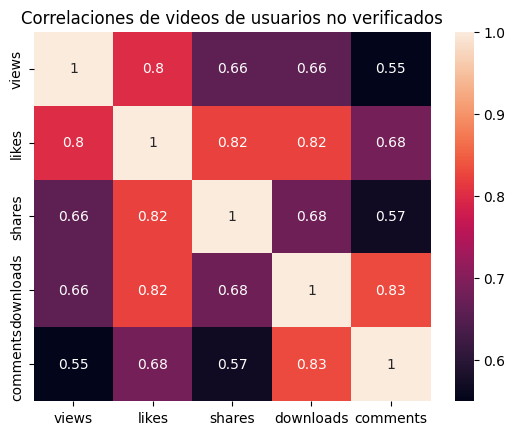

In [13]:
# Veamos ahora si esta correlación varía para usuarios no verificados 
tiktok_not_verified = tiktok.copy() # Para evitar warnings
tiktok_not_verified = tiktok_not_verified[tiktok_not_verified['verified_status'] == 'not verified']
tiktok_not_verified.drop(columns=['video_duration_sec', 'claim_status', 'verified_status', 'video_transcription_text', 'author_ban_status', 'text_length'], inplace=True)
tiktok_not_verified.columns = ['views', 'likes', 'shares', 'downloads', 'comments'] 
sns.heatmap(tiktok_not_verified.corr(numeric_only=True), annot=True)
plt.title('Correlaciones de videos de usuarios no verificados')

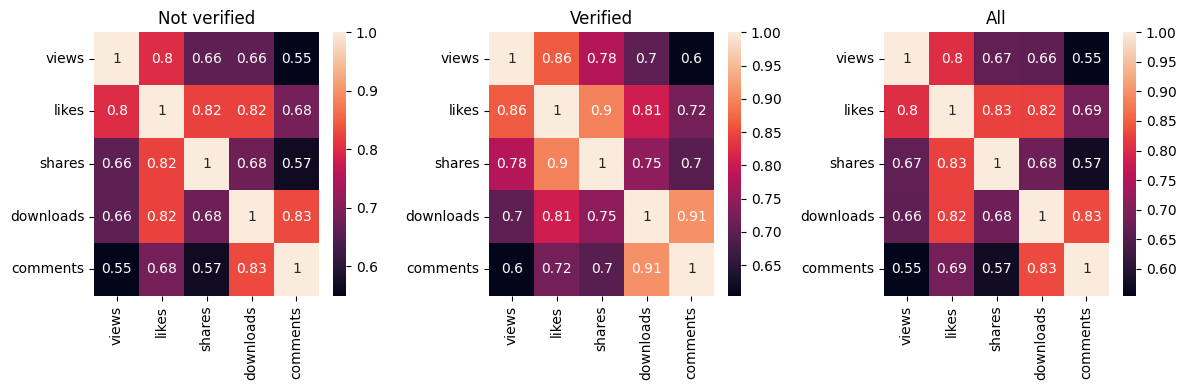

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

sns.heatmap(tiktok_not_verified.corr(numeric_only=True), annot=True, ax=axs[0])
axs[0].set_title('Not verified')

sns.heatmap(tiktok_verified.corr(numeric_only=True), annot=True, ax=axs[1]);
axs[1].set_title('Verified')

sns.heatmap(tiktok_corr.corr(numeric_only=True), annot=True, ax=axs[2]);
axs[2].set_title('All')

plt.tight_layout()
plt.show()

In [53]:
tiktok['verified_status'].value_counts(normalize=True)*100
# Es 17884 no verificados contra 1200 verificados, por lo que la correlación de "Not verified" y "all" podriamos considerarlas idénticas.

# Como obervamos la variable mas relacionada con las visualizaciones son los likes, aumentando todas cuando el usuario esta verificado,
# Esta información puede llegar a ser muy útil si no conseguimos sacar conclusiones de una variable, podemos usar una muy correlacionada
# para ver los resultados de una con la otra.

verified_status
not verified    93.71201
verified         6.28799
Name: proportion, dtype: float64

In [16]:
# Aun quedan varias columnas por analizar

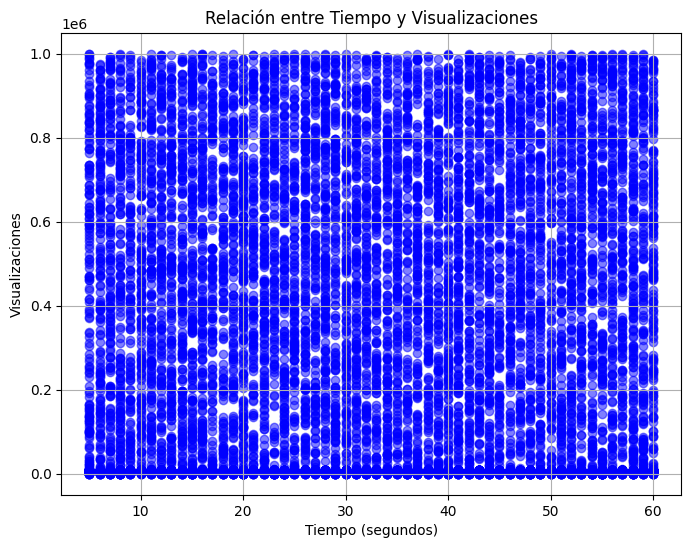

In [17]:
# Vemos si el tiempo del video es un factor fundamental para el triunfo de este
plt.figure(figsize=(8, 6))
plt.scatter(tiktok['video_duration_sec'], tiktok['video_view_count'], color='blue', alpha=0.5) # Scatter plot
plt.title('Relación entre Tiempo y Visualizaciones')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Visualizaciones')
plt.grid(True)
plt.show()
# Obervamos que a simple vista no hay un patrón claro y que tampoco ayuda que existan casi 20000 muestras, asi que podemos cortar en intervalos para
# apreciar mejor los resultados.

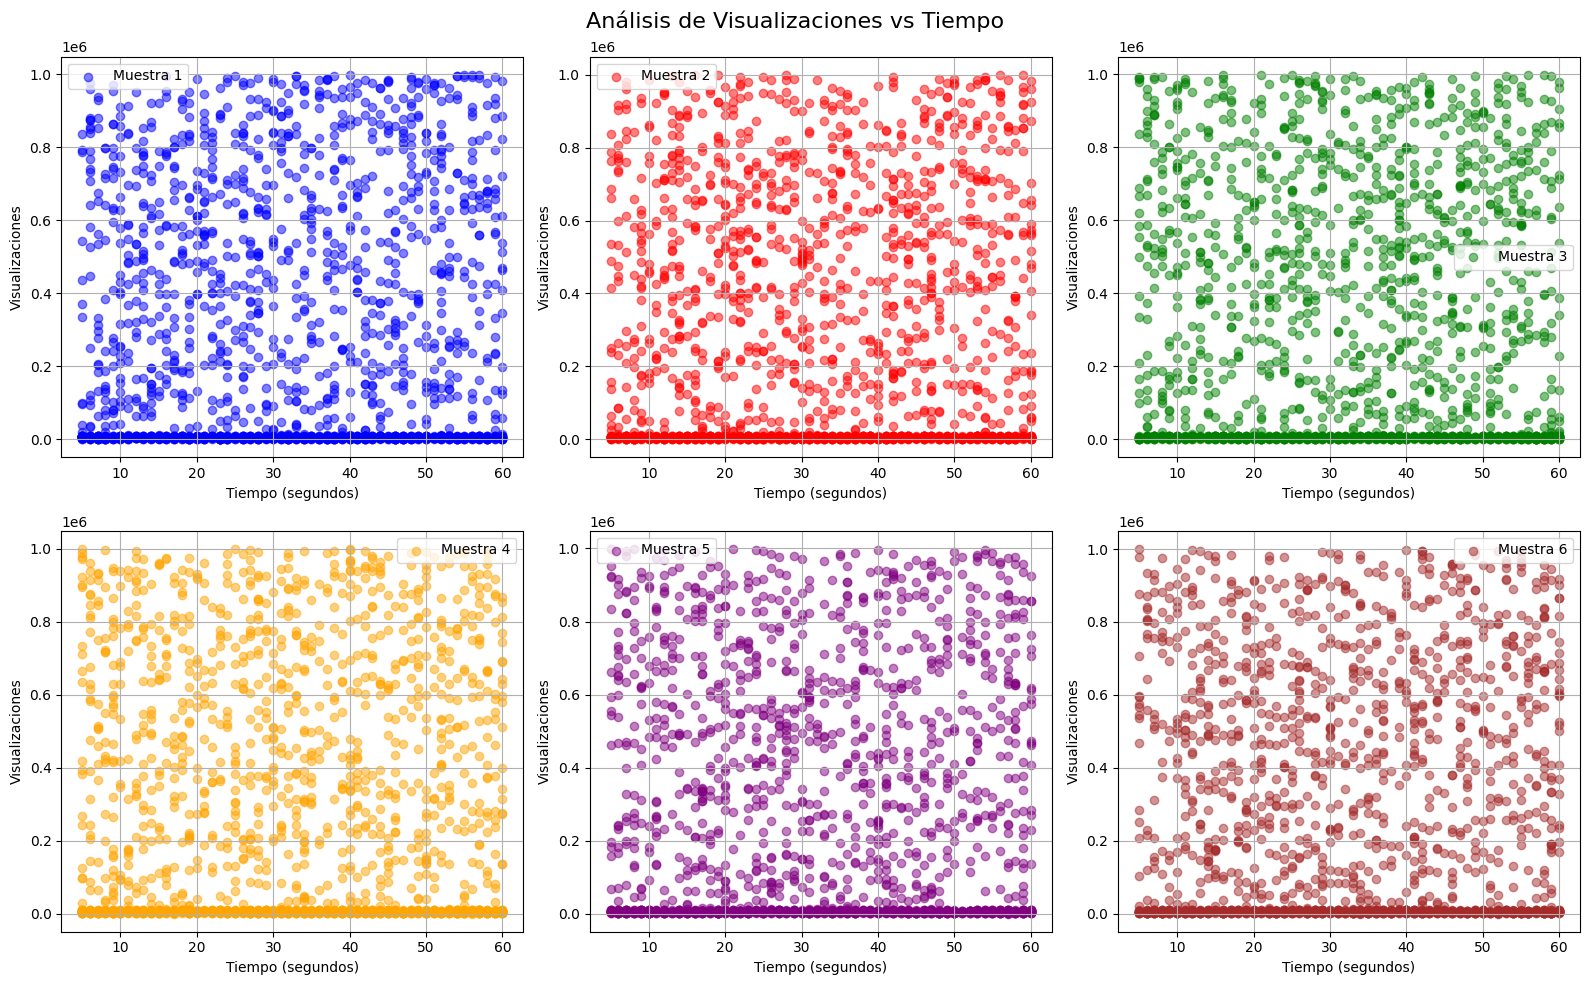

In [18]:
# Vamos a coger 2000 muestras aleatorias
muestras_1000_1 = tiktok.sample(2000)
muestras_1000_2 = tiktok.sample(2000)
muestras_1000_3 = tiktok.sample(2000)
muestras_1000_4 = tiktok.sample(2000)
muestras_1000_5 = tiktok.sample(2000)
muestras_1000_6 = tiktok.sample(2000)

def scatter_plot(ax, x, y, color, label):
    ax.scatter(x, y, color=color, alpha=0.5, label=label)
    ax.set_xlabel('Tiempo (segundos)')
    ax.set_ylabel('Visualizaciones')
    ax.grid(True)
    ax.legend()

fig, axs = plt.subplots(2, 3, figsize=(16, 10))
scatter_plot(axs[0, 0], muestras_1000_1['video_duration_sec'], muestras_1000_1['video_view_count'], color='blue', label='Muestra 1')
scatter_plot(axs[0, 1], muestras_1000_2['video_duration_sec'], muestras_1000_2['video_view_count'], color='red', label='Muestra 2')
scatter_plot(axs[0, 2], muestras_1000_3['video_duration_sec'], muestras_1000_3['video_view_count'], color='green', label='Muestra 3')
scatter_plot(axs[1, 0], muestras_1000_4['video_duration_sec'], muestras_1000_4['video_view_count'], color='orange', label='Muestra 4')
scatter_plot(axs[1, 1], muestras_1000_5['video_duration_sec'], muestras_1000_5['video_view_count'], color='purple', label='Muestra 5')
scatter_plot(axs[1, 2], muestras_1000_6['video_duration_sec'], muestras_1000_6['video_view_count'], color='brown', label='Muestra 6')

plt.suptitle('Análisis de Visualizaciones vs Tiempo', fontsize=16)
plt.tight_layout()
plt.show()

In [19]:
# Como obervamos no podemos concluir que el tiempo este relacionado con las visualizaciones de los videos, asi que podemos analizar
# tanto el tiempo del video como el texto transcrito mediante la columna lenght_text con los likes ya que sabemos que hay una muy fuerte
# correlacion entre los me gustas y las visualizaciones de los videos.

In [20]:
# Para ello creamos dos columnas nuevas, la duración en tiempo y la longitud en texto, clasificando las duraciones y longitudes de forma cualitativa,
# para ello primero debemos ver que podriamos considerar como largo, corto o medio.

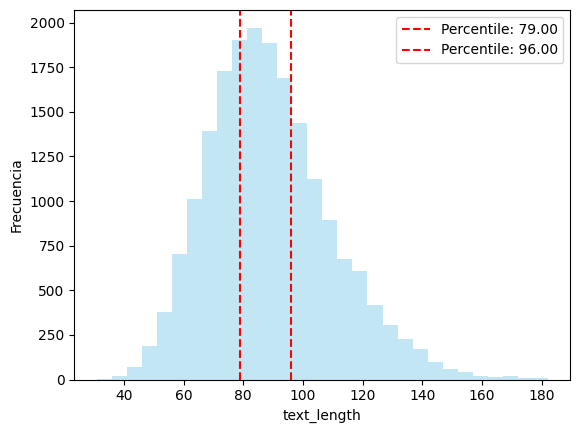

In [21]:
# ¿Como separamos la longitud del texto en parte iguales?
percentiles = np.percentile(tiktok['text_length'], [33.33, 66.66])

plt.hist(tiktok['text_length'], bins=30, alpha=0.5, color='skyblue')

# Dibujar líneas verticales para los percentiles
for percentile in percentiles:
    plt.axvline(x=percentile, color='red', linestyle='--', label=f'Percentile: {percentile:.2f}')

plt.xlabel('text_length')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

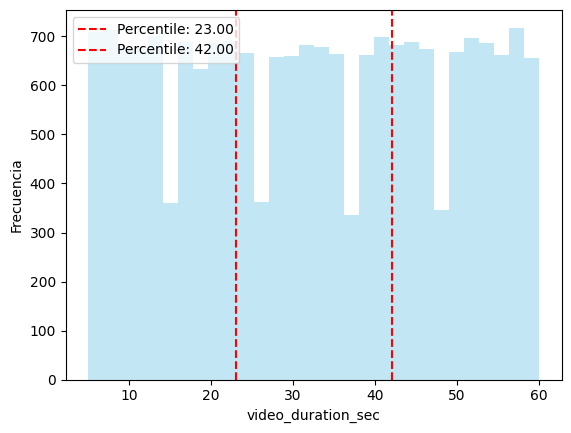

In [22]:
# ¿Como separamos el tiempo que duran los videos en parte iguales?
percentiles = np.percentile(tiktok['video_duration_sec'], [33.33, 66.66])

plt.hist(tiktok['video_duration_sec'], bins=30, alpha=0.5, color='skyblue')

# Dibujar líneas verticales para los percentiles
for percentile in percentiles:
    plt.axvline(x=percentile, color='red', linestyle='--', label=f'Percentile: {percentile:.2f}')

plt.xlabel('video_duration_sec')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

In [23]:
# Creamos las nuevas columnas
def durat_tiempo(x):
    if x >= 42:
        return 'largo'
    elif x <= 23: 
        return 'corto'
    else:
        return 'medio'
    
def durat_texto(x):
    if x <= 79:
        return 'corto'
    if x >= 96:
        return 'largo'
    else:
        return 'medio'

tiktok['duration_tiempo'] = tiktok['video_duration_sec'].apply(lambda x: durat_tiempo(x))
tiktok['duration_texto'] = tiktok['text_length'].apply(lambda x: durat_texto(x))

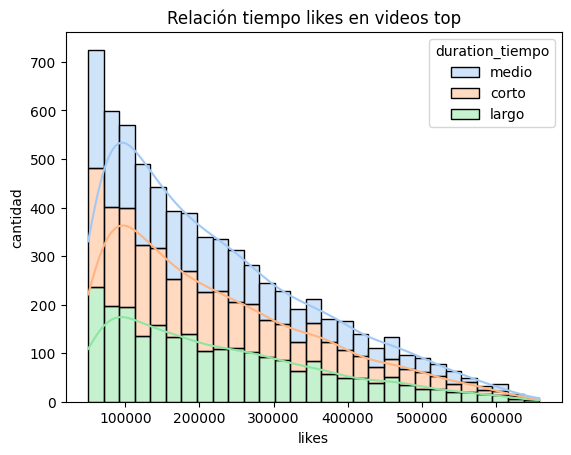

In [24]:
tiktok_top = tiktok[tiktok['video_like_count'] > 50000] # Quitamos toda la media
sns.histplot(data=tiktok_top, stat="count", multiple="stack", x="video_like_count", kde=True, palette="pastel", 
             hue="duration_tiempo", element="bars", legend=True)

# Añadir etiqueta al eje x y al eje y
plt.xlabel("likes")
plt.ylabel("cantidad")
plt.title("Relación tiempo likes en videos top")
plt.show()

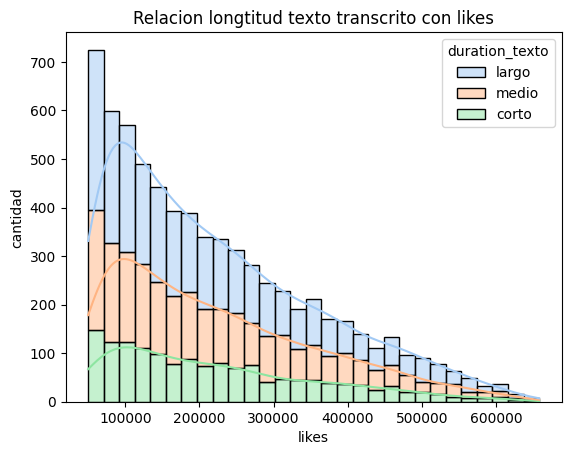

In [25]:
tiktok_top = tiktok[tiktok['video_like_count'] > 50000] # Quitamos toda la media
sns.histplot(data=tiktok_top, stat="count", multiple="stack", x="video_like_count", kde=True, palette="pastel", 
             hue="duration_texto", element="bars", legend=True)

# Añadir etiqueta al eje x y al eje y
plt.xlabel("likes")
plt.ylabel("cantidad")
plt.title("Relacion longtitud texto transcrito con likes")
plt.show()

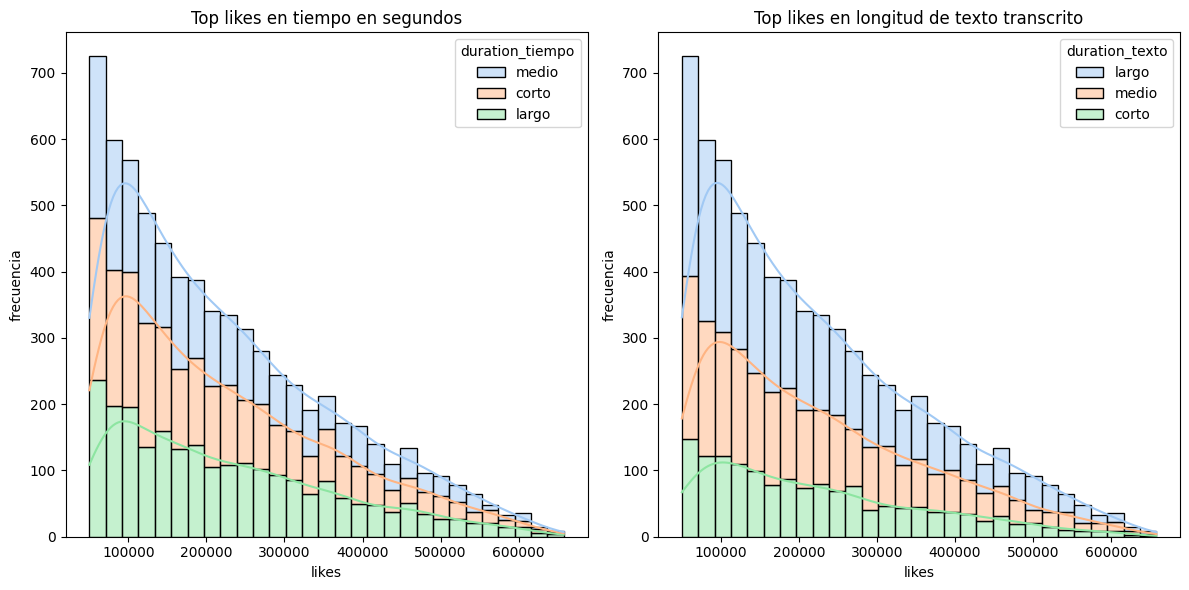

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Graficar el primer histograma en el primer subgráfico
tiktok_top = tiktok[tiktok['video_like_count'] > 50000]
sns.histplot(data=tiktok_top, stat="count", multiple="stack", x="video_like_count", kde=True, palette="pastel", 
             hue="duration_tiempo", element="bars", legend=True, ax=axes[0])

# Añadir etiquetas al primer subgráfico
axes[0].set_xlabel("likes")
axes[0].set_ylabel("frecuencia")
axes[0].set_title("Top likes en tiempo en segundos")

# Graficar el segundo histograma en el segundo subgráfico
sns.histplot(data=tiktok_top, stat="count", multiple="stack", x="video_like_count", kde=True, palette="pastel", 
             hue="duration_texto", element="bars", legend=True, ax=axes[1])

# Añadir etiquetas al segundo subgráfico
axes[1].set_xlabel("likes")
axes[1].set_ylabel("frecuencia")
axes[1].set_title("Top likes en longitud de texto transcrito")

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

# Podriamos sacar conclusiones sólidas, siempre y cuando estos datos variasen respecto a todas las muestras, porque recordemos que estos graficos
# estan filtrados por los videos tops en likes.

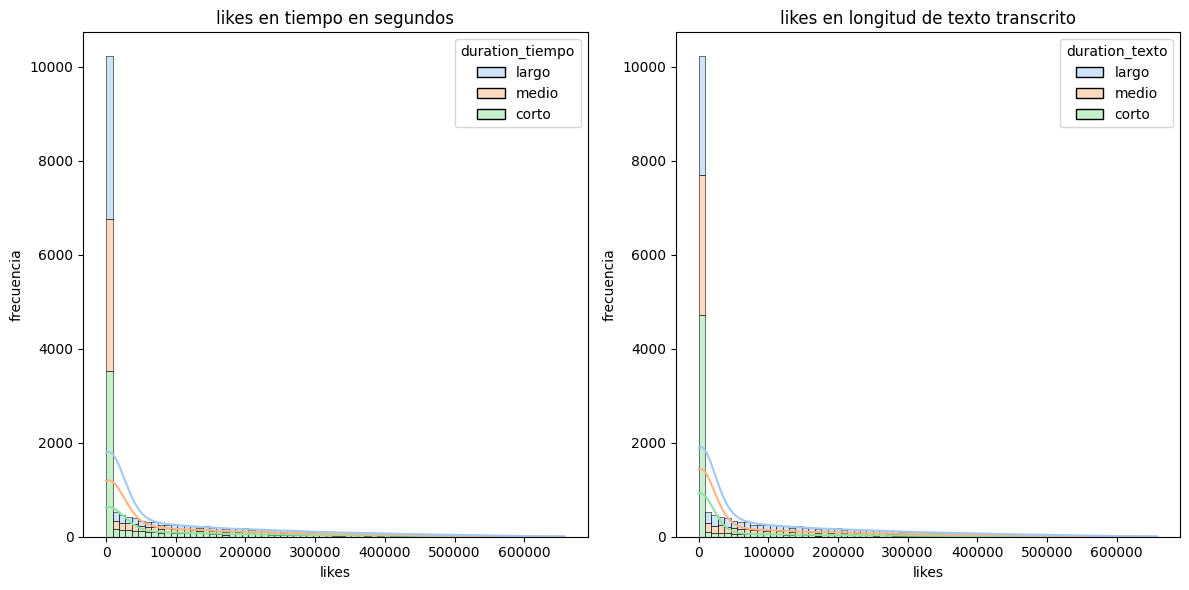

In [27]:
# Los mismos gráfricos pero con toda la muestra
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Graficar el primer histograma en el primer subgráfico
tiktok_top = tiktok[tiktok['video_like_count'] > 50000]
sns.histplot(data=tiktok, stat="count", multiple="stack", x="video_like_count", kde=True, palette="pastel", 
             hue="duration_tiempo", element="bars", legend=True, ax=axes[0])

# Añadir etiquetas al primer subgráfico
axes[0].set_xlabel("likes")
axes[0].set_ylabel("frecuencia")
axes[0].set_title("likes en tiempo en segundos")

# Graficar el segundo histograma en el segundo subgráfico
sns.histplot(data=tiktok, stat="count", multiple="stack", x="video_like_count", kde=True, palette="pastel", 
             hue="duration_texto", element="bars", legend=True, ax=axes[1])

# Añadir etiquetas al segundo subgráfico
axes[1].set_xlabel("likes")
axes[1].set_ylabel("frecuencia")
axes[1].set_title("likes en longitud de texto transcrito")

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

In [28]:
# Aqui si podemos sacar conclusiones, por lo visto la combinación de texto transcrito y duración del video son distintas para videos con un número
# mediocre de likes, que para los videos tops en likes, por lo que podríamos considerar, tener una transcripción de texto mas larga y una duración
# en tiempo en la categoría media que se sitúa entre 23 y 42 segundos.

In [29]:
# Claim status

In [30]:
tiktok.groupby(['claim_status'])['video_view_count'].sum() # Como vemos el conteo total de visualizaciones de las claims son superiores por un factor de 100

claim_status
claim      4.813891e+09
opinion    4.696715e+07
Name: video_view_count, dtype: float64

In [31]:
tiktok['claim_status'].value_counts() # Pero hay casi las mismas opiniones que claims, por lo que tenemos un ganador muy claro. Visualicemoslo

claim_status
claim      9608
opinion    9476
Name: count, dtype: int64

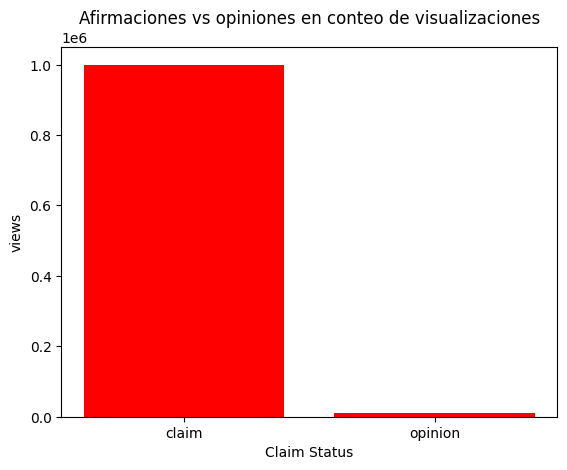

In [66]:
# Gráfico de claim vs opionions
plt.bar(tiktok['claim_status'], tiktok['video_view_count'], color='r')
# Agregar etiquetas y título
plt.xlabel('Claim Status')
plt.ylabel('views')
# Mostrar el gráfico

plt.title('Afirmaciones vs opiniones en conteo de visualizaciones')
plt.show()

In [33]:
# La conclusión es clara, si podemos elegir en nuestro video si queremos orientarlo a una opinion o una afirmación, la afirmación es por mucho
# la mejor opción posible, sin embargo podriamos llegar a pensar que en el caso de que el usuario este verificado, la opinión podría coger muchisimo
# mas peso, comprobemoslo.

In [34]:
tiktok.groupby(['claim_status', 'verified_status'])['video_view_count'].mean()

claim_status  verified_status
claim         not verified       501016.617938
              verified           501606.650718
opinion       not verified         4958.862110
              verified             4935.627649
Name: video_view_count, dtype: float64

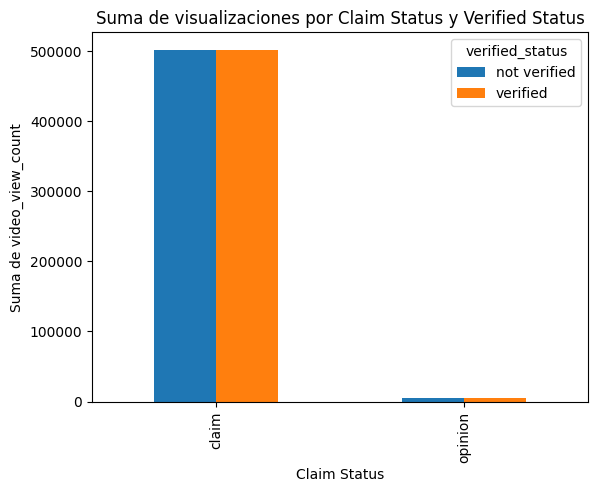

In [35]:
# Agrupar por claim_status y verified_status, y hacer su media
data = tiktok.groupby(['claim_status', 'verified_status'])['video_view_count'].mean().unstack() # Como hay muchisimas mas muestras de not verified
# que de verified usando las medias podremos visualizar mejor
data.plot(kind='bar')

plt.xlabel('Claim Status')
plt.ylabel('Suma de video_view_count')
plt.title('Suma de visualizaciones por Claim Status y Verified Status')

plt.show() # Realmente esto no nos dice nada pq hay muchisimos mas no verified que verified por lo que la suma de no verified siempre sera mayor

#### ¿Merecen la pena las cuentas verificadas?

In [36]:
# Como vemos de media las opiniones da igual que el usuario este verificado o no, dan un resultado malisimo, entonces nos planteamos la siguiente
# pregunta ¿Merece la pena el verificado entonces? 

In [37]:
# ¿Realmente necesitamos estar verificados para conseguir una muy buena viralidad?
tiktok.groupby(['verified_status'])['video_view_count'].sum()
tiktok['verified_status'].value_counts(normalize=True)

# De todos los usuarios del dataset solo el 6% estan verificados, con esto podemos intuir la dificultad de verificar una cuenta, que a priori no parece
# tener grandes ventajas en términos de viralización

verified_status
not verified    0.93712
verified        0.06288
Name: proportion, dtype: float64

In [38]:
# De momento lo que tenemos es muy poco porcentaje de verificados, un número de visualizaciones muy bajo en opiniones y un numero muy parecido
# en afirmaciones con usuarios no verificados. De momento el único punto fuerte demostrable es el gran aumento en la correlación de las visualizaciones
# con los likes, comentarios, descargas, etc... En videos de cuentas verificadas.

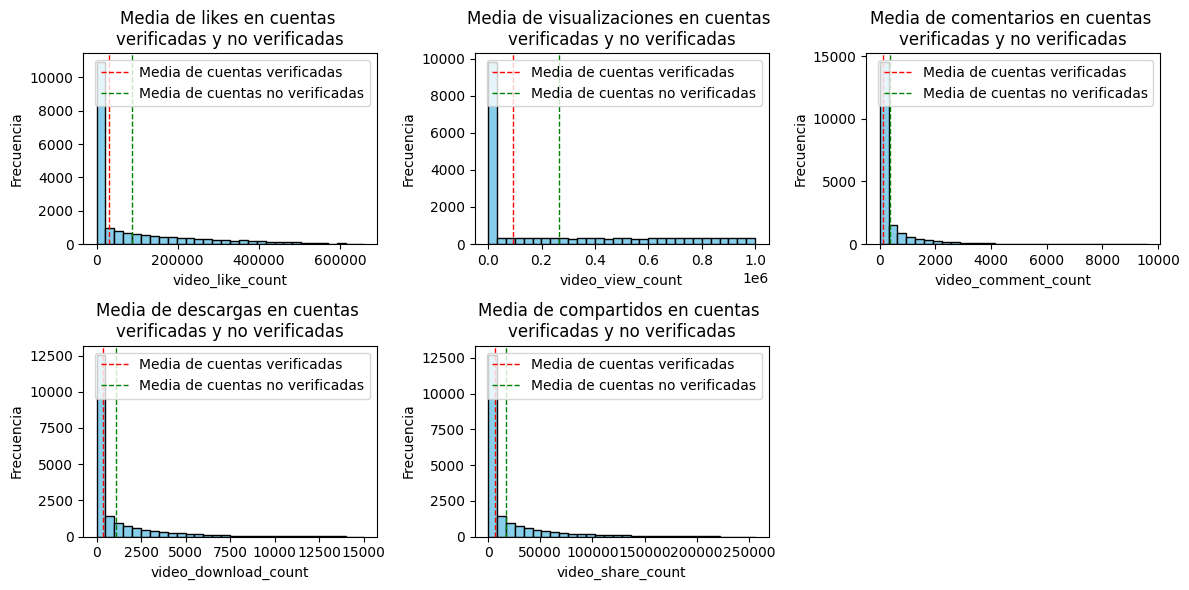

In [39]:
# visualizamos las medias de cuentas verificadas y no verificadas de todas las variables de un video

fig, axes = plt.subplots(2, 3, figsize=(12, 6))

# Primer grafico
axes[0, 0].hist(tiktok['video_like_count'], bins=30, color='skyblue', edgecolor='black')
axes[0, 0].axvline(tiktok[tiktok['verified_status'] == 'verified']['video_like_count'].mean(), color='red', linestyle='dashed', linewidth=1, label='Media de cuentas verificadas')
axes[0, 0].axvline(tiktok[tiktok['verified_status'] == 'not verified']['video_like_count'].mean(), color='green', linestyle='dashed', linewidth=1, label='Media de cuentas no verificadas')

axes[0, 0].set_xlabel('video_like_count')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].set_title('Media de likes en cuentas \nverificadas y no verificadas')
axes[0, 0].legend()

# Segundo grafico
axes[0, 1].hist(tiktok['video_view_count'], bins=30, color='skyblue', edgecolor='black')
axes[0, 1].axvline(tiktok[tiktok['verified_status'] == 'verified']['video_view_count'].mean(), color='red', linestyle='dashed', linewidth=1, label='Media de cuentas verificadas')
axes[0, 1].axvline(tiktok[tiktok['verified_status'] == 'not verified']['video_view_count'].mean(), color='green', linestyle='dashed', linewidth=1, label='Media de cuentas no verificadas')

axes[0, 1].set_xlabel('video_view_count')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].set_title('Media de visualizaciones en cuentas \nverificadas y no verificadas')
axes[0, 1].legend()

# Tercer grafico
axes[0, 2].hist(tiktok['video_comment_count'], bins=30, color='skyblue', edgecolor='black')
axes[0, 2].axvline(tiktok[tiktok['verified_status'] == 'verified']['video_comment_count'].mean(), color='red', linestyle='dashed', linewidth=1, label='Media de cuentas verificadas')
axes[0, 2].axvline(tiktok[tiktok['verified_status'] == 'not verified']['video_comment_count'].mean(), color='green', linestyle='dashed', linewidth=1, label='Media de cuentas no verificadas')

axes[0, 2].set_xlabel('video_comment_count')
axes[0, 2].set_ylabel('Frecuencia')
axes[0, 2].set_title('Media de comentarios en cuentas \nverificadas y no verificadas')
axes[0, 2].legend()

# Cuarto grafico
axes[1, 0].hist(tiktok['video_download_count'], bins=30, color='skyblue', edgecolor='black')
axes[1, 0].axvline(tiktok[tiktok['verified_status'] == 'verified']['video_download_count'].mean(), color='red', linestyle='dashed', linewidth=1, label='Media de cuentas verificadas')
axes[1, 0].axvline(tiktok[tiktok['verified_status'] == 'not verified']['video_download_count'].mean(), color='green', linestyle='dashed', linewidth=1, label='Media de cuentas no verificadas')

axes[1, 0].set_xlabel('video_download_count')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].set_title('Media de descargas en cuentas \nverificadas y no verificadas')
axes[1, 0].legend()

# Quinto grafico
axes[1, 1].hist(tiktok['video_share_count'], bins=30, color='skyblue', edgecolor='black')
axes[1, 1].axvline(tiktok[tiktok['verified_status'] == 'verified']['video_share_count'].mean(), color='red', linestyle='dashed', linewidth=1, label='Media de cuentas verificadas')
axes[1, 1].axvline(tiktok[tiktok['verified_status'] == 'not verified']['video_share_count'].mean(), color='green', linestyle='dashed', linewidth=1, label='Media de cuentas no verificadas')

axes[1, 1].set_xlabel('video_share_count')
axes[1, 1].set_ylabel('Frecuencia')
axes[1, 1].set_title('Media de compartidos en cuentas \nverificadas y no verificadas')
axes[1, 1].legend()

# Ajustar el diseño y mostrar el gráfico
fig.delaxes(axes[1, 2])
plt.tight_layout()
plt.show()


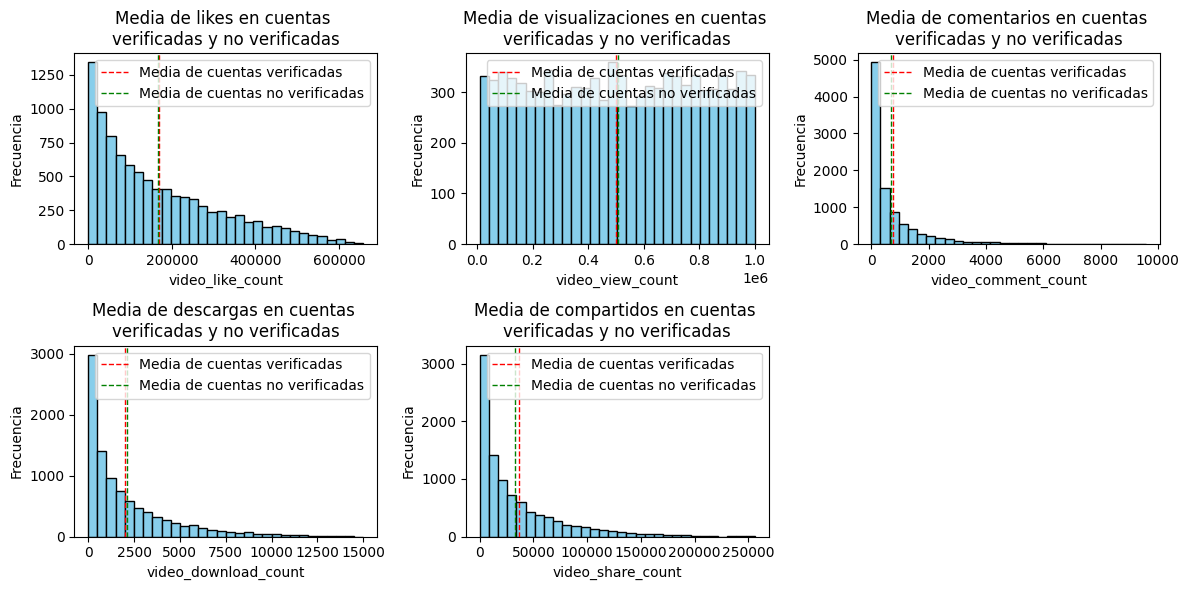

In [40]:
# Podemos hacer esta comprobación en publicaciones mas top, a ver si las cuentas verificadas cogen mas peso.
tiktok_top = tiktok[tiktok['video_view_count'] > (0.1 * 100000)]
fig, axes = plt.subplots(2, 3, figsize=(12, 6))

# Primer gráfico
axes[0, 0].hist(tiktok_top['video_like_count'], bins=30, color='skyblue', edgecolor='black')
axes[0, 0].axvline(tiktok_top[tiktok_top['verified_status'] == 'verified']['video_like_count'].mean(), color='red', linestyle='dashed', linewidth=1, label='Media de cuentas verificadas')
axes[0, 0].axvline(tiktok_top[tiktok_top['verified_status'] == 'not verified']['video_like_count'].mean(), color='green', linestyle='dashed', linewidth=1, label='Media de cuentas no verificadas')

axes[0, 0].set_xlabel('video_like_count')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].set_title('Media de likes en cuentas \nverificadas y no verificadas')
axes[0, 0].legend()

# Segundo gráfico
axes[0, 1].hist(tiktok_top['video_view_count'], bins=30, color='skyblue', edgecolor='black')
axes[0, 1].axvline(tiktok_top[tiktok_top['verified_status'] == 'verified']['video_view_count'].mean(), color='red', linestyle='dashed', linewidth=1, label='Media de cuentas verificadas')
axes[0, 1].axvline(tiktok_top[tiktok_top['verified_status'] == 'not verified']['video_view_count'].mean(), color='green', linestyle='dashed', linewidth=1, label='Media de cuentas no verificadas')

axes[0, 1].set_xlabel('video_view_count')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].set_title('Media de visualizaciones en cuentas \nverificadas y no verificadas')
axes[0, 1].legend()

# Tercer gráfico
axes[0, 2].hist(tiktok_top['video_comment_count'], bins=30, color='skyblue', edgecolor='black')
axes[0, 2].axvline(tiktok_top[tiktok_top['verified_status'] == 'verified']['video_comment_count'].mean(), color='red', linestyle='dashed', linewidth=1, label='Media de cuentas verificadas')
axes[0, 2].axvline(tiktok_top[tiktok_top['verified_status'] == 'not verified']['video_comment_count'].mean(), color='green', linestyle='dashed', linewidth=1, label='Media de cuentas no verificadas')

axes[0, 2].set_xlabel('video_comment_count')
axes[0, 2].set_ylabel('Frecuencia')
axes[0, 2].set_title('Media de comentarios en cuentas \nverificadas y no verificadas')
axes[0, 2].legend()

# Cuarto gráfico
axes[1, 0].hist(tiktok_top['video_download_count'], bins=30, color='skyblue', edgecolor='black')
axes[1, 0].axvline(tiktok_top[tiktok_top['verified_status'] == 'verified']['video_download_count'].mean(), color='red', linestyle='dashed', linewidth=1, label='Media de cuentas verificadas')
axes[1, 0].axvline(tiktok_top[tiktok_top['verified_status'] == 'not verified']['video_download_count'].mean(), color='green', linestyle='dashed', linewidth=1, label='Media de cuentas no verificadas')

axes[1, 0].set_xlabel('video_download_count')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].set_title('Media de descargas en cuentas \nverificadas y no verificadas')
axes[1, 0].legend()

# Quinto gráfico
axes[1, 1].hist(tiktok_top['video_share_count'], bins=30, color='skyblue', edgecolor='black')
axes[1, 1].axvline(tiktok_top[tiktok_top['verified_status'] == 'verified']['video_share_count'].mean(), color='red', linestyle='dashed', linewidth=1, label='Media de cuentas verificadas')
axes[1, 1].axvline(tiktok_top[tiktok_top['verified_status'] == 'not verified']['video_share_count'].mean(), color='green', linestyle='dashed', linewidth=1, label='Media de cuentas no verificadas')

axes[1, 1].set_xlabel('video_share_count')
axes[1, 1].set_ylabel('Frecuencia')
axes[1, 1].set_title('Media de compartidos en cuentas \nverificadas y no verificadas')
axes[1, 1].legend()

# Ajustar el diseño y mostrar el gráfico
fig.delaxes(axes[1, 2])
plt.tight_layout()
plt.show()


In [41]:
# Como podemos observar las cuentas verificadas no destacan en absolutamente ninguno de los campos, incluso estan por debajo a las cuentas no verificadas.
# En publicaciones con mas repercusión si que las medias parecen estar parejas; hay que añadir que la diferencia entre muestras nos impide dar 
# una conclusión totalmente sólida. 

# Lo que si podemos determinar es que las cuentas verificadas no parecen tener un impacto mucho mayor en las publicaciones que las cuentas no verificadas´
# asi que habría que considerar que es lo que cuesta conseguir verificar una cuenta para poder decidir si merece la pena o no, pero en un principio
# no será algo importante en lo que fijarse.

#### ¿Podemos tomar alguna medida para evitar ser baneados?

In [42]:
# A pesar de no tener acceso al contenido del video en si, podemos intentar ver si existen ciertos patrones que provocan que los videos puedan
# ser baneados.

In [74]:
tiktok['author_ban_status'].value_counts(normalize=True)*100 # 8 %  estan baneados y 10% bajo revisión, parece bastante

author_ban_status
active          80.606791
under review    10.825823
banned           8.567386
Name: proportion, dtype: float64

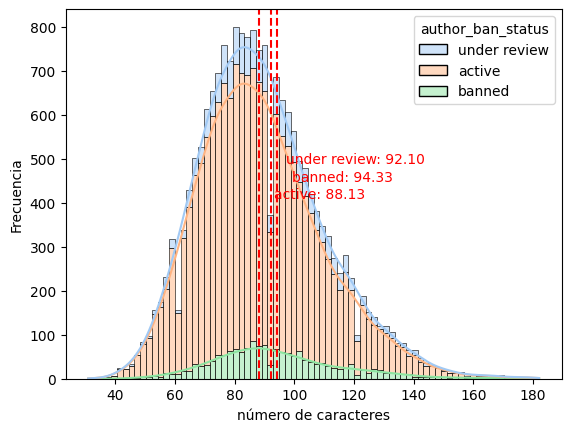

In [44]:
# Comprobamos si existe relación entre el texto transcrito en términos de longitud y los baneos
sns.histplot(data=tiktok, stat="count", multiple="stack", x="text_length", kde=True, palette="pastel", 
             hue="author_ban_status", element="bars", legend=True)

# Calcular las medias para cada categoría
mean_data = tiktok.groupby("author_ban_status")["text_length"].mean()

# Definir un desplazamiento vertical inicial para los textos de las medias
vertical_offset = 10

# Dibujar líneas verticales para las medias y agregar etiquetas personalizadas
for status, mean_value in mean_data.items():
    # Ajustar la posición de la línea de media para evitar superposición con la leyenda
    plt.axvline(x=mean_value, color='r', linestyle='--')
    # Ajustar la posición vertical de los textos de las medias para evitar superposiciones
    plt.text(mean_value + 5, 400 + vertical_offset, f'{status}: {mean_value:.2f}', color='red')
    # Aumentar el desplazamiento vertical para el siguiente texto de la media
    vertical_offset += 40

# Añadir etiqueta al eje x y al eje y
plt.xlabel("número de caracteres")
plt.ylabel("Frecuencia")
plt.show()

# Podriamos considerar que la longitud del texto transcrito tiene que ver con la posibilidad de ser baneado, aunque no podemos concluirlo
# probamos lo mismo con el tiempo

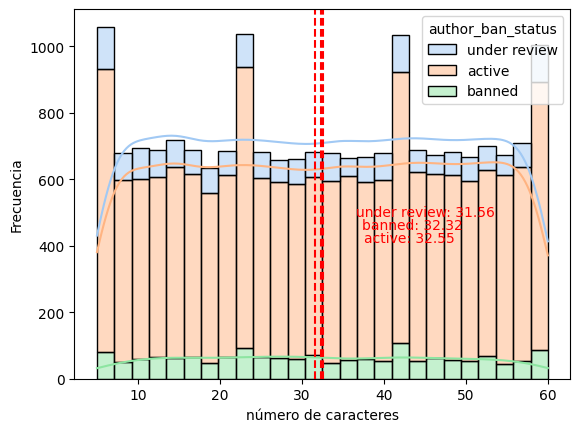

In [45]:
# Lo mismo pero con el tiempo en segundos
sns.histplot(data=tiktok, stat="count", multiple="stack", x="video_duration_sec", kde=True, palette="pastel", 
             hue="author_ban_status", element="bars", legend=True)

# Calcular las medias para cada categoría
mean_data = tiktok.groupby("author_ban_status")["video_duration_sec"].mean()

# Definir un desplazamiento vertical inicial para los textos de las medias
vertical_offset = 10

# Dibujar líneas verticales para las medias y agregar etiquetas personalizadas
for status, mean_value in mean_data.items():
    # Ajustar la posición de la línea de media para evitar superposición con la leyenda
    plt.axvline(x=mean_value, color='r', linestyle='--')
    # Ajustar la posición vertical de los textos de las medias para evitar superposiciones
    plt.text(mean_value + 5, 400 + vertical_offset, f'{status}: {mean_value:.2f}', color='red')
    # Aumentar el desplazamiento vertical para el siguiente texto de la media
    vertical_offset += 40

# Añadir etiqueta al eje x y al eje y
plt.xlabel("número de caracteres")
plt.ylabel("Frecuencia")
plt.show()

# Nada todas dan una media parecida que ademas esta cercana a la media de duracion, sin conclusiones

In [46]:
# Hacemos código para buscar modas en palabras en cuentas baneadas, activas y bajo revisión, creando varios diccionarios y ordenandolos
tiktok_baneados = tiktok[tiktok['author_ban_status'] == 'banned']
tiktok_under_review = tiktok[tiktok['author_ban_status'] == 'under review']
tiktok_activos = tiktok[tiktok['author_ban_status'] == 'active']

dicc_baneados = {}
dicc_under_review = {}
dicc_activos = {}
dicc_baneados_limpio = {}
dicc_activos_limpio = {}
dicc_under_review_limpio = {}

palabras_separadoras = ["that", "discovered", "opinion"] # Quitamos por las palabras introductorias que no proporcionan demasiada informacion y manchan mucho
palabras_a_eliminar = ['a','were','as','be','it','most','will','our','at' 'i','more','with', 'the', 'that', 'in', 'on', 'of', 'is', 'an', 'are', 'to', 'my', 'has', 'can', 'from', 'by', 'than', 'was', 'their', 'have', 'for', 'and']

def dividir_por_palabra(cadena, palabras_separadoras):
    for i in palabras_separadoras:
        if i in cadena:
            partes = cadena.split(i)
            return partes[1]
    return cadena

def dic(x, dicc):
    x = dividir_por_palabra(x, palabras_separadoras)
    y = x.split() # esto es la lista
    for i in y:
        if i in dicc:
            dicc[i] += 1
        else:
            dicc[i] = 1

def limpiar(dicc_sucio, dicc_limpio_): # Quitamos algunas palabras como pronombres o palabras introductorias para no manchar la comprobación
    for clave, valor in dicc_sucio.items():
        if clave not in palabras_a_eliminar:
            dicc_limpio_[clave] = valor

tiktok_baneados['video_transcription_text'].apply(lambda x: dic(str(x), dicc_baneados)) # Llenamos el diccionario
tiktok_under_review['video_transcription_text'].apply(lambda x: dic(str(x), dicc_under_review)) # Llenamos el diccionario
tiktok_activos['video_transcription_text'].apply(lambda x: dic(str(x), dicc_activos)) # Llenamos el diccionario

limpiar(dicc_baneados, dicc_baneados_limpio)
limpiar(dicc_activos, dicc_activos_limpio)
limpiar(dicc_under_review, dicc_under_review_limpio)

diccionario_ordenado_baneados = dict(sorted(dicc_baneados_limpio.items(), key=lambda item: item[1], reverse=True))
diccionario_ordenado_under_review = dict(sorted(dicc_under_review_limpio.items(), key=lambda item: item[1], reverse=True))
diccionario_ordenado_activos = dict(sorted(dicc_activos_limpio.items(), key=lambda item: item[1], reverse=True))

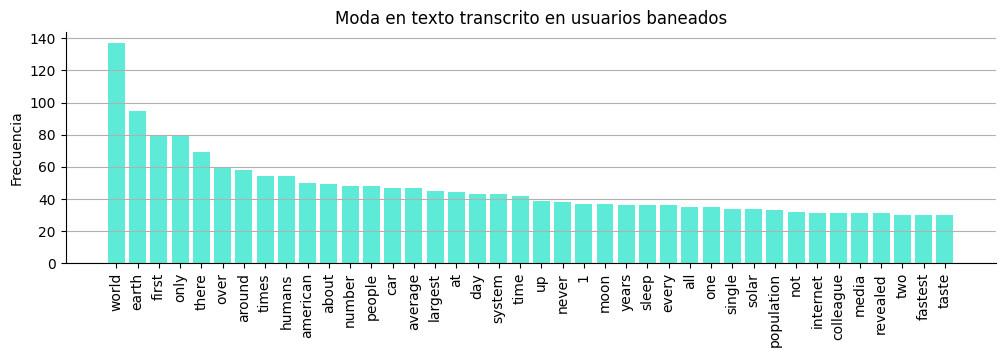

In [76]:
# Baneados
palabras = list(diccionario_ordenado_baneados.keys())[:40]
frecuencias = list(diccionario_ordenado_baneados.values())[:40]

fig, ax = plt.subplots(figsize=(12,3))
ax.bar(palabras, frecuencias, color='#5DEBD7')
ax.set_ylabel('Frecuencia')
ax.yaxis.grid(True)
ax.spines['top'].set_visible(False)   # Ocultar el borde superior
ax.spines['right'].set_visible(False) # Ocultar el borde derecho
plt.title('Moda en texto transcrito en usuarios baneados')
plt.xticks(rotation=90)

plt.show()

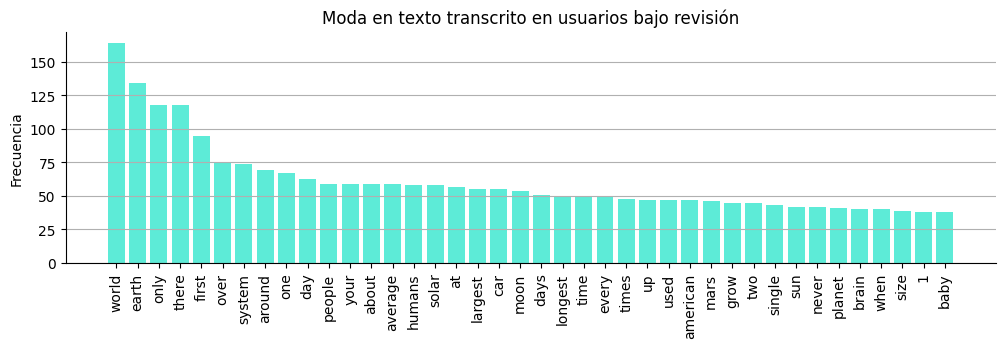

In [78]:
# Bajo revisión
palabras = list(diccionario_ordenado_under_review.keys())[:40]
frecuencias = list(diccionario_ordenado_under_review.values())[:40]

fig, ax = plt.subplots(figsize=(12,3))
ax.bar(palabras, frecuencias, color='#5DEBD7')
ax.set_ylabel('Frecuencia')
ax.yaxis.grid(True)
ax.spines['top'].set_visible(False)   # Ocultar el borde superior
ax.spines['right'].set_visible(False) # Ocultar el borde derecho
plt.title('Moda en texto transcrito en usuarios bajo revisión')
plt.xticks(rotation=90)

plt.show()

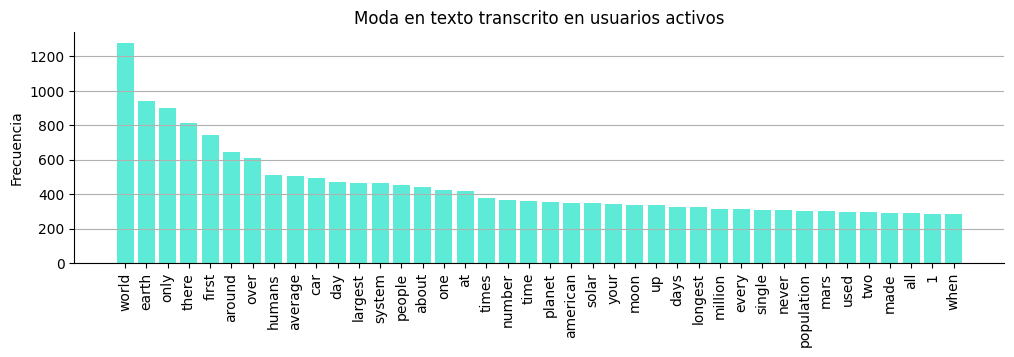

In [77]:
# Activos
palabras = list(diccionario_ordenado_activos.keys())[:40]
frecuencias = list(diccionario_ordenado_activos.values())[:40]

fig, ax = plt.subplots(figsize=(12,3))
ax.bar(palabras, frecuencias, color='#5DEBD7')
ax.set_ylabel('Frecuencia')
ax.yaxis.grid(True)
ax.spines['top'].set_visible(False)   # Ocultar el borde superior
ax.spines['right'].set_visible(False) # Ocultar el borde derecho
plt.title('Moda en texto transcrito en usuarios activos')
plt.xticks(rotation=90)

plt.show()

In [50]:
# Como observamos no es que no podamos sacar conclusiones sino que se repiten un montón de palabras en los 3 tipos, haciendo no solo imposible
# determinar posibles palabras que provoquen baneos, sino que parece que no tiene nada que ver, haciendo que todo el peso de poder ser baneado
# caiga en el video en si, como es lo lógico.

#### Conclusiones globales

De forma resumida podriamos decir que la mejor forma de hacer viral un video, es evidentemente el contenido de este, como se esperaba, sin embargo, existen bastantes factores que podrian ayudar a este a crecer mas rapidamente. Como hemos estudiado las mejores formas de ayudar a viralizar un video son las siguientes:
    - En primer lugar debemos tener en cuenta las correlaciones, partiendo del punto de que nuestro objetivo son las visualizaciones
    - En cuanto a la creación de este, lo mas recomendable es mantener un tiempo medio (entre 23 y 42 segundos)
    - En cuanto al texto que se habla lo recomendable es mantenerlo en largo (superior a 96 carácteres)
    - Sin duda el video tiene que estar orientado en ser una claim (una afirmación) debido a que demostramos que tiene muchisimo mas éxito
      que si esta orientado hacia una opinión.


Por otro lado habria que considerar cuanto trabajo costaría obtener el verificado de la cuenta, en caso de ser algo muy costoso (cosa probable por la poca cantidad de usuarios no verificados que existen en este dataset), podriamos considerar que no merece la pena ya que no parece que las cuentas verificadas tengan una gran ventaja de media respecto a los no verificados, la ventaja mas notable es el aumento de correlación entre las vistas y el resto de parametros en cuentas verificadas.


En cuanto a posibles medidas para evitar baneos hemos observado que las cuentas baneadas suelen tener videos con transcripcion de texto mas largo, sin embargo no es algo que podamos concluir, y despues de hacer un estudio en la moda de las palabras de cuentas tanto baneadas, acticas como bajo revisión podemos concluir que no existen palabras clave que tiendan a banear la cuenta, pudiendo determinar que si no es el 100%, casi el 100% de la posibilidad de baneo recae sobre el contenido en video, como era de esperar.